**<font color='red'> Rubrics -**
---
**<font color='red'> Data Preprocessing,Feature Selection and Engineering - 30**
---
**<font color='red'> Model Training,Evaluation and Best Model Selection - 30**
---
**<font color='red'> Interpretability and Story Telling - 38**
---



**<font color='red'> Great job in your data analysis, especially in how you've approached it. However, in this particular case, using K-cross Validation might not be necessary. It could potentially disrupt the temporal order, causing the loss of crucial time-related patterns or trends within the data.**

**<font color='red'> Your approach stands out by deriving key insights based on the number of non-fraudulent and fraudulent company records. This unique method reflects out-of-the-box thinking and offers a strong solution to our problem.**

**<font color='red'> - 2 marks The presentation and Readme document seem well-prepared, indicating a significant effort invested in achieving optimal results. However, the absence of labels for the Final Model AUC plot could hinder its effectiveness in achieving its intended goals. Simply plotting it without proper descriptions might not fulfill its purpose adequately.**

**<font color='red'> You could have tried to get bonus points by checking for robustness of the model.**

# Final Exam - Bhargav Bhalodi

# Dependencies

In [ ]:
from google.colab import drive
# mount Google Drive to work with Google Colab
# this code block is not necessary if using locally stored data
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import dependencies
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier

# Understanding the data

In [ ]:
# get data
data = pd.read_csv("/content/drive/MyDrive/ML & AI/Second half/FINAL_DATA_2023.csv")

# data dimensions
data.shape

(146045, 31)

In [ ]:
# data overview
data.head()

,fyear,gvkey,fraud,act,ap,at,ceq,che,cogs,csho,...,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f
0,1990,1009,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,...,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000
1,1990,1011,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,...,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188
2,1990,1017,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,...,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125
3,1990,1021,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,...,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562
4,1990,1028,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,...,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125


In [ ]:
# variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   fyear   146045 non-null  int64  
 1   gvkey   146045 non-null  int64  
 2   fraud   146045 non-null  int64  
 3   act     146045 non-null  float64
 4   ap      146045 non-null  float64
 5   at      146045 non-null  float64
 6   ceq     146045 non-null  float64
 7   che     146045 non-null  float64
 8   cogs    146045 non-null  float64
 9   csho    146045 non-null  float64
 10  dlc     146045 non-null  float64
 11  dltis   146045 non-null  float64
 12  dltt    146045 non-null  float64
 13  dp      146045 non-null  float64
 14  ib      146045 non-null  float64
 15  invt    146045 non-null  float64
 16  ivao    146045 non-null  float64
 17  ivst    146045 non-null  float64
 18  lct     146045 non-null  float64
 19  lt      146045 non-null  float64
 20  ni      146045 non-null  float64
 21  ppegt   14

In [ ]:
# unique fiscal years and companies in the data
print(f"Number of unique fiscal years: {len(data['fyear'].unique())}\n\
Number of unique companies: {len(data['gvkey'].unique())}")

Number of unique fiscal years: 25
Number of unique companies: 18444


In [ ]:
# check for missing values
data.isna().sum()

fyear     0
gvkey     0
fraud     0
act       0
ap        0
at        0
ceq       0
che       0
cogs      0
csho      0
dlc       0
dltis     0
dltt      0
dp        0
ib        0
invt      0
ivao      0
ivst      0
lct       0
lt        0
ni        0
ppegt     0
pstk      0
re        0
rect      0
sale      0
sstk      0
txp       0
txt       0
xint      0
prcc_f    0
dtype: int64

In [ ]:
# check if each unique company has corresponding data for each fiscal year
data.groupby(['fyear']).count()['gvkey']

fyear
1990    4582
1991    4713
1992    4970
1993    5377
1994    5684
1995    6230
1996    6745
1997    6789
1998    6716
1999    6828
2000    6752
2001    6362
2002    6067
2003    5981
2004    5934
2005    5863
2006    5908
2007    5868
2008    5612
2009    5367
2010    5389
2011    5404
2012    5630
2013    5647
2014    5627
Name: gvkey, dtype: int64

In [ ]:
# it appears that we have unequal time lengths for different companies
# some companies have more years of observations than other companies
# this type of data can create problems in certain models if they work with data of equal lengths

# check the time lengths for each unique company
time_lengths = data.groupby('gvkey')['fyear'].count().reset_index()
time_lengths.columns = ['Company', 'Number of years of data']

# display the time lengths of different companies
print(time_lengths.sort_values(by='Number of years of data', ascending=False))

       Company  Number of years of data
3424     11929                       25
883       3937                       25
2745      9904                       25
831       3785                       25
2741      9882                       25
...        ...                      ...
8997     30418                        1
8992     30396                        1
8991     30387                        1
8979     30356                        1
18443   317264                        1

[18444 rows x 2 columns]


<Axes: xlabel='Number of years of data', ylabel='count'>

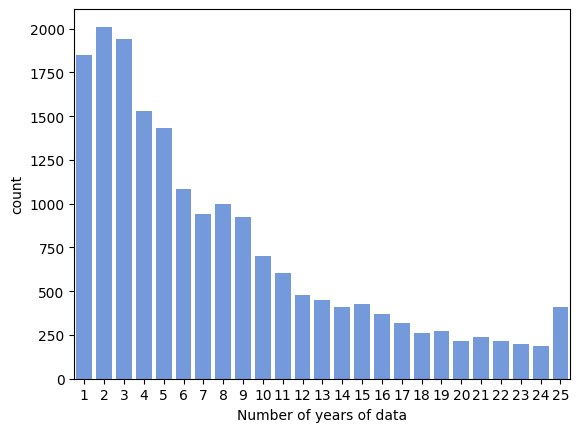

In [ ]:
# some companies have only 1 year of data
# check the distribution of number of years of data for the companies
sns.countplot(data=time_lengths, x='Number of years of data', color='cornflowerblue')

In [ ]:
# it seems that a lot of the companies have only few years of data
# explore how the target variable is distributed with respect to number of years of data
for i in range(2, 27):
  company_lengths = list(time_lengths[time_lengths['Number of years of data'] < i]['Company'])
  print(f"Data less than: {i} years, Number of accounting fraud observations: {(data[data['gvkey'].isin(company_lengths)]['fraud'] == 1).sum()}")

Data less than: 2 years, Number of accounting fraud observations: 13
Data less than: 3 years, Number of accounting fraud observations: 37
Data less than: 4 years, Number of accounting fraud observations: 79
Data less than: 5 years, Number of accounting fraud observations: 117
Data less than: 6 years, Number of accounting fraud observations: 169
Data less than: 7 years, Number of accounting fraud observations: 199
Data less than: 8 years, Number of accounting fraud observations: 232
Data less than: 9 years, Number of accounting fraud observations: 268
Data less than: 10 years, Number of accounting fraud observations: 323
Data less than: 11 years, Number of accounting fraud observations: 379
Data less than: 12 years, Number of accounting fraud observations: 412
Data less than: 13 years, Number of accounting fraud observations: 441
Data less than: 14 years, Number of accounting fraud observations: 484
Data less than: 15 years, Number of accounting fraud observations: 511
Data less than: 1

In [ ]:
# total number of fraud observations
(data['fraud'] == 1).sum()

964

In [ ]:
# the proportion of fraud observations is extremely low
# data is highly unbalanced
# positive class/1 = fraud, negative class/0 = not fraud

# explore the proportion of positive class for companies with 1 year of data
one_year_companies = time_lengths[time_lengths['Number of years of data'] == 1]['Company'].reset_index(drop=True)
one_year_labels = data[data['gvkey'].isin(one_year_companies)]['fraud'].reset_index(drop=True)
print(f"Positive class observations in companies with 1 year of data: {(one_year_labels == 1).sum()}")

Positive class observations in companies with 1 year of data: 13


<Axes: xlabel='Frauds', ylabel='count'>

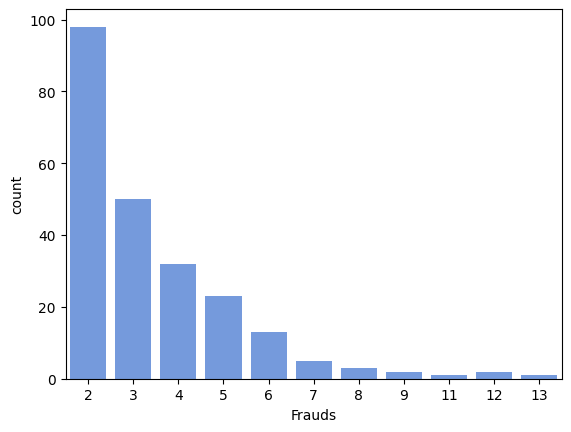

In [ ]:
# check for multiple fraud occurrencies for each company
multiple_frauds = (data.groupby('gvkey')['fraud'].sum()).reset_index()
multiple_frauds.columns = ['Company', 'Frauds']
multiple_frauds = multiple_frauds[multiple_frauds['Frauds'] > 1]
sns.countplot(data=multiple_frauds, x='Frauds', color='cornflowerblue')

# Deciding a modeling approach based on the understanding of data

---

### Train and test data formulations
Since the data available is longitudinal data (tracking companies over time), and the goal is to create a predictive model to predict the future trajectory (fraud/not fraud) of companies, forming a meaningful test dataset is essential in deciding my modeling approach.

### Data split approach 1:
I decided to define the test set as the last/most recent year of observations for all the the companies, leaving the rest of the observations for the training set. This methodology has a lot of advantages.
- Some companies only have 1 year of data, which by this methodology would only be present in the test data. This will be beneficial to the analysis since it can test how well the model generalizes to unseen data, since these companies do not have any corresponding information in the training set.
- While the other companies have prior years' information in the training set, this methodology works given the goal of creating a predictive model that can leverage prior data to make future trajectory predictions.

### Data split approach 2:
Despite advantages of the prior method, model performance is significantly impacted given that the data is severely imbalanced. Hence, I decided to switch to another approach - undersampling the dataset to create a slightly higher balance between classes. For this approach, I switched to K-fold cross validation and train/test split of 70/30 using a stratified sampling methodology. Since undersampling removes a lot of observations, creating the test dataset like that in approach 1 does not work well here. Hence, this new validation method is used.



### Classification metrics
The models I will create will focus on binary classification on the test data. Based on the observations made in the prior section, the data is known to be highly unbalanced. This impacts the choice of reliable classification metrics that can be used to assess the models' performances.

- Accuracy would be a highly misleading indicator, given that extremely high accuracy can be achieved simply by always predicting a negative class since the proportion of negative class is significantly higher than that of the positive class.
- Precision and recall for the positive class are high significance given the imbalance in data. These will allow me to compare models on their ability to correctly identify positive classes. Between precision and recall, the latter is important to accurately identify as many positive classes as possible. This is because the model prediction merely serves as an initial red flag, and further detailed evaluation of the predicted accounting fraud cases conducted by a human expert can help clear up a false positive class prediction. Missing out on identifying a positive class can have enormous impacts for various stakeholders. However, high number of false positives may contribute to the increase in time and effort required by human professionals to mitigate concerns. Given this, precision is also important to ensure minimal false positives. Keeping in mind this trade-off, I will focus on both recall and precision metrics heavily in assessing the models.
- Aread Under the Receiver Operating Characteristic Curve (AUC-ROC) is another crucial metric for this problem since it allows me to holistically assess the models' abilities to distinguish between the positive and negative classes at varying classification thresholds. Hence, AUC-ROC will be another metric that I will focus on.


### Impacts on modeling approach
Establishing this methodology prior to attempting any modeling/pre-processing is crucial since it affects what approaches can/should be considered for this problem, because models often come with various underlying assumptions for the data. For example, Logistic Regression assumes that the observations are independent of each other, which may not hold for the data available for this problem given that companies are being tracked over time and the feature values of a company at a particular time period are likely related to the values of the prior time period. Additionally, some models may not handle highly imbalaned data as well as others. Hence, modeling approaches will have to be considerate of the data available and may need relevant modifications.

---

# Data pre-processing and EDA

In [ ]:
# standardize the data
scaler = StandardScaler()
feature_cols = data.columns.difference(['fyear', 'gvkey', 'fraud'])
standardized_data = scaler.fit_transform(data[feature_cols])
standardized_df = pd.DataFrame(standardized_data, columns=feature_cols)
standardized_df['fyear'] = data['fyear']
standardized_df['gvkey'] = data['gvkey']
standardized_df['fraud'] = data['fraud']
standardized_df

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,re,rect,sale,sstk,txp,txt,xint,fyear,gvkey,fraud
0,-0.194364,-0.170167,-0.195833,-0.174189,-0.164342,-0.161569,-0.174678,-0.121148,-0.103446,-0.195698,...,-0.089310,-0.165897,-0.180167,-0.128242,-0.121463,-0.115496,-0.209309,1990,1009,0
1,-0.196714,-0.172967,-0.197886,-0.175296,-0.164215,-0.165318,-0.172774,-0.124336,-0.122382,-0.200141,...,-0.091128,-0.170083,-0.183749,-0.128214,-0.121463,-0.117126,-0.218676,1990,1011,0
2,-0.182348,-0.170296,-0.188659,-0.166649,-0.161990,-0.151822,-0.172171,-0.118056,-0.119629,-0.188214,...,-0.080761,-0.140245,-0.170094,-0.128242,-0.121463,-0.115036,-0.200296,1990,1017,0
3,-0.190455,-0.169965,-0.195644,-0.173895,-0.164035,-0.161495,-0.170557,-0.115764,-0.123260,-0.199000,...,-0.089754,-0.164866,-0.179413,-0.128242,-0.119168,-0.116352,-0.209663,1990,1021,0
4,-0.192420,-0.170374,-0.196233,-0.177829,-0.163580,-0.161311,-0.166896,-0.092878,-0.123620,-0.202247,...,-0.095820,-0.166240,-0.180845,-0.128242,-0.121463,-0.117126,-0.202797,1990,1028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,-0.126918,-0.161897,-0.095273,-0.137045,-0.039427,-0.138220,0.001374,-0.101680,0.235981,-0.014725,...,-0.174252,-0.119053,-0.138015,1.373164,-0.112756,-0.062648,0.079863,2014,314866,0
146041,0.224475,-0.071876,0.182607,0.310954,0.585232,-0.124244,0.157269,-0.109598,0.293212,0.324138,...,-0.164024,0.037190,-0.102220,6.885432,-0.035930,-0.131328,-0.008105,2014,315318,0
146042,0.063013,0.064443,-0.029951,-0.176377,0.053997,-0.014838,-0.002170,-0.075876,0.463617,0.254306,...,-0.091638,-0.005531,0.021603,-0.062863,0.064455,0.061358,0.050540,2014,316056,0
146043,-0.183229,-0.172249,-0.171573,-0.112301,-0.129471,-0.162371,-0.136027,-0.124357,-0.099058,-0.202347,...,-0.090435,-0.168300,-0.178976,0.336364,-0.115255,-0.114557,-0.215887,2014,317260,0


In [ ]:
# defining the test dataset

# most recent year of observation for each company
last_years = standardized_df.groupby('gvkey')['fyear'].max().reset_index()
test_data = pd.merge(standardized_df, last_years, on=['gvkey', 'fyear'], how='inner')
test_labels = test_data['fraud']
test_df = test_data.drop(columns=['fraud', 'gvkey', 'fyear'])
test_df

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,ppegt,prcc_f,pstk,re,rect,sale,sstk,txp,txt,xint
0,-0.192420,-0.170374,-0.196233,-0.177829,-0.163580,-0.161311,-0.166896,-0.092878,-0.123620,-0.202247,...,-0.164639,-0.326487,-0.093795,-0.095820,-0.166240,-0.180845,-0.128242,-0.121463,-0.117126,-0.202797
1,-0.195049,-0.169262,-0.197468,-0.176140,-0.159740,-0.161180,-0.157992,-0.121111,-0.121148,-0.199994,...,-0.164211,-0.306071,-0.093585,-0.113961,-0.170147,-0.184056,-0.083093,-0.121463,-0.117126,-0.215987
2,-0.184163,-0.168502,-0.193606,-0.168214,-0.156378,-0.160314,-0.100270,-0.124215,-0.123620,-0.202347,...,-0.163277,-0.332321,-0.093795,-0.100206,-0.158987,-0.176747,-0.125585,-0.121463,-0.116882,-0.221818
3,-0.194974,-0.171659,-0.197550,-0.175122,-0.164200,-0.163808,-0.166306,-0.123868,-0.123620,-0.201371,...,-0.164394,-0.343987,-0.045496,-0.093061,-0.168709,-0.182344,-0.128242,-0.121463,-0.117126,-0.219943
4,-0.190876,-0.170488,-0.194619,-0.172208,-0.154305,-0.156227,-0.173145,-0.122348,-0.119537,-0.196389,...,-0.162008,-0.224404,-0.093795,-0.092351,-0.167904,-0.176193,-0.128020,-0.121463,-0.115371,-0.209840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18439,-0.126918,-0.161897,-0.095273,-0.137045,-0.039427,-0.138220,0.001374,-0.101680,0.235981,-0.014725,...,-0.146664,0.094097,-0.093795,-0.174252,-0.119053,-0.138015,1.373164,-0.112756,-0.062648,0.079863
18440,0.224475,-0.071876,0.182607,0.310954,0.585232,-0.124244,0.157269,-0.109598,0.293212,0.324138,...,-0.146470,0.189064,-0.093795,-0.164024,0.037190,-0.102220,6.885432,-0.035930,-0.131328,-0.008105
18441,0.063013,0.064443,-0.029951,-0.176377,0.053997,-0.014838,-0.002170,-0.075876,0.463617,0.254306,...,-0.108284,0.941332,-0.093795,-0.091638,-0.005531,0.021603,-0.062863,0.064455,0.061358,0.050540
18442,-0.183229,-0.172249,-0.171573,-0.112301,-0.129471,-0.162371,-0.136027,-0.124357,-0.099058,-0.202347,...,-0.137860,-0.066203,-0.093795,-0.090435,-0.168300,-0.178976,0.336364,-0.115255,-0.114557,-0.215887


In [ ]:
# check if proportion of positive class in the test data is adequate
print(f"Positive classes in entire data: {(standardized_df['fraud']==1).sum()}\n\
Number of rows in the entire data: {standardized_df.shape[0]}\n\
Proportion of positive class in the entire data: {(standardized_df['fraud']==1).sum()/standardized_df.shape[0]}\n\
Positive classes in the test data: {(test_labels == 1).sum()}\n\
Number of rows in the test data: {test_df.shape[0]}\n\
Proportion of positive class in the test data: {(test_labels == 1).sum()/test_df.shape[0]}")

Positive classes in entire data: 964
Number of rows in the entire data: 146045
Proportion of positive class in the entire data: 0.006600705262076757
Positive classes in the test data: 89
Number of rows in the test data: 18444
Proportion of positive class in the test data: 0.004825417479939276


In [ ]:
# defining the train dataset

# merge standardized_df and test_data with indicator
merged_data = pd.merge(standardized_df, test_data, on=['gvkey', 'fyear'], how='left', indicator=True, suffixes=('', '_y'))

# filter rows that are only in the standardized_df
rows_not_in_test = merged_data[merged_data['_merge'] == 'left_only']

# Select only the columns from the standardized_df
train_data = rows_not_in_test[standardized_df.columns].reset_index(drop=True)
train_labels = train_data['fraud']
train_df = train_data.drop(columns=['fraud', 'gvkey', 'fyear'])
train_df

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,ppegt,prcc_f,pstk,re,rect,sale,sstk,txp,txt,xint
0,-0.194364,-0.170167,-0.195833,-0.174189,-0.164342,-0.161569,-0.174678,-0.121148,-0.103446,-0.195698,...,-0.162118,-0.212737,-0.093795,-0.089310,-0.165897,-0.180167,-0.128242,-0.121463,-0.115496,-0.209309
1,-0.196714,-0.172967,-0.197886,-0.175296,-0.164215,-0.165318,-0.172774,-0.124336,-0.122382,-0.200141,...,-0.164489,-0.325017,-0.093795,-0.091128,-0.170083,-0.183749,-0.128214,-0.121463,-0.117126,-0.218676
2,-0.182348,-0.170296,-0.188659,-0.166649,-0.161990,-0.151822,-0.172171,-0.118056,-0.119629,-0.188214,...,-0.157602,-0.233154,-0.093795,-0.080761,-0.140245,-0.170094,-0.128242,-0.121463,-0.115036,-0.200296
3,-0.190455,-0.169965,-0.195644,-0.173895,-0.164035,-0.161495,-0.170557,-0.115764,-0.123260,-0.199000,...,-0.164118,-0.316291,-0.080811,-0.089754,-0.164866,-0.179413,-0.128242,-0.119168,-0.116352,-0.209663
4,-0.157417,-0.150536,-0.171065,-0.153475,-0.157972,-0.145988,-0.158576,-0.081019,-0.123453,-0.164242,...,-0.152694,0.239347,-0.093795,-0.077367,-0.122595,-0.157353,-0.128242,-0.085242,-0.098866,-0.156130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127596,-0.196351,-0.173684,-0.195933,-0.169610,-0.162938,-0.165461,-0.051780,-0.124357,-0.123620,-0.202347,...,-0.162441,-0.350637,-0.093795,-0.090689,-0.169800,-0.184102,-0.128242,-0.121463,-0.117190,-0.222211
127597,0.148841,0.150838,0.234577,0.063536,0.443267,0.242810,0.051063,0.182718,0.206299,0.531053,...,0.212763,0.007530,-0.093795,-0.011606,0.022033,0.263531,0.722862,-0.121463,-0.018642,0.472130
127598,-0.178931,-0.172524,-0.192739,-0.163091,-0.120288,-0.165200,-0.031276,-0.124300,-0.123620,-0.202347,...,-0.164937,-0.337571,-0.093795,-0.121912,-0.169849,-0.183883,0.115423,-0.121463,-0.116922,-0.222189
127599,-0.192292,-0.075403,-0.112451,-0.001217,-0.152428,-0.165461,5.491424,-0.124357,-0.123620,-0.202347,...,-0.066960,-0.347487,-0.093795,-0.132115,-0.169447,-0.184102,0.024059,-0.121463,-0.117126,-0.199323


In [ ]:
# verify that the partitioning was performed correctly
pd.merge(train_data, test_data, how='inner')

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,re,rect,sale,sstk,txp,txt,xint,fyear,gvkey,fraud


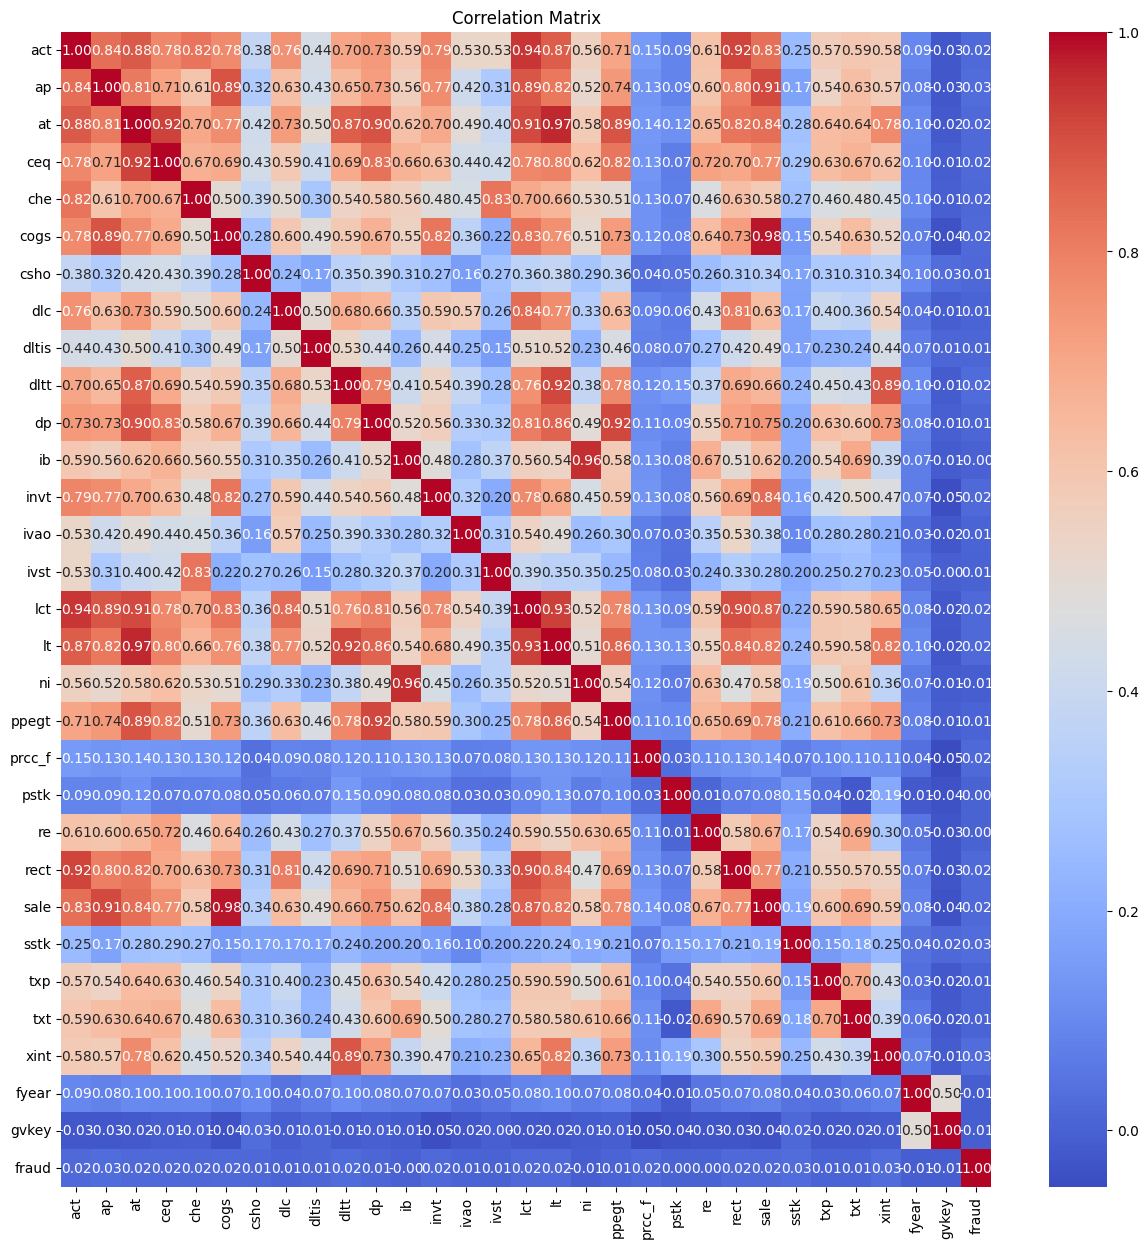

In [ ]:
# generate and visualize a correlation matrix
corr_matrix = standardized_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# explore multicollinearity
[print(standardized_df.columns[i], variance_inflation_factor(standardized_df.values, i)) for i in range(len(standardized_df.columns))]

act 117.70098130927778
ap 10.982600083710619
at 716.6064702225754
ceq 128.04661330612555
che 21.2281092242227
cogs 63.76435263919079
csho 1.309127245049546
dlc 8.363769341081683
dltis 1.6936041638586559
dltt 16.967511002006876
dp 11.960256822129214
ib 16.195544777909006
invt 9.276992905516266
ivao 2.148444870551855
ivst 4.3541729385932415
lct 58.46482252093394
lt 313.681652256223
ni 12.545176282065686
ppegt 13.460625643132591
prcc_f 1.0357391262683053
pstk 1.1304896496457595
re 3.6198078710237187
rect 27.281616818503192
sale 96.78465664542769
sstk 1.1741536703994906
txp 2.5756273488191512
txt 3.992480848769603
xint 6.0721765259785965
fyear 1.8443527030487608
gvkey 1.8514413061466195
fraud 1.0106386806305523


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

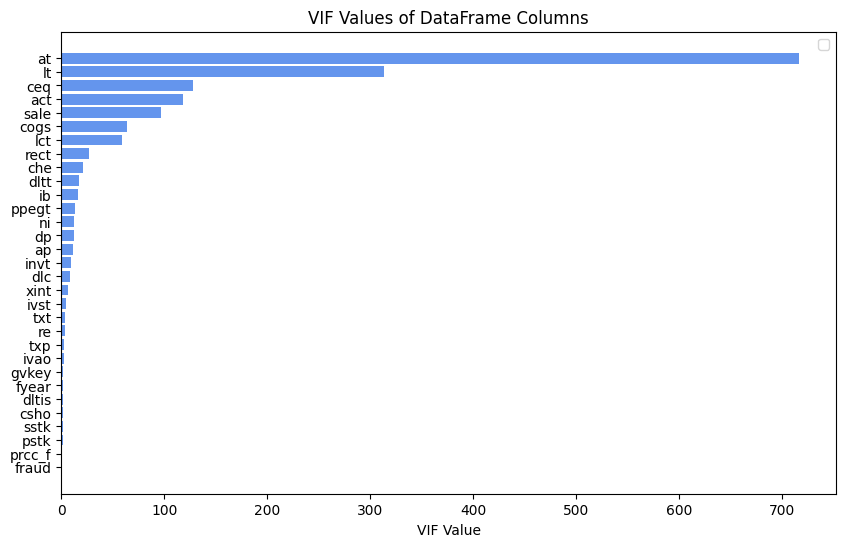

In [ ]:
# calculate VIF values
vif_data = pd.DataFrame()
vif_data["Column"] = standardized_df.columns
vif_data["VIF"] = [variance_inflation_factor(standardized_df.values, i) for i in range(standardized_df.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# plotting VIF values with bars in descending order
plt.figure(figsize=(10, 6))
bars = plt.barh(vif_data['Column'], vif_data['VIF'], color='cornflowerblue')
plt.xlabel('VIF Value')
plt.title('VIF Values of DataFrame Columns')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

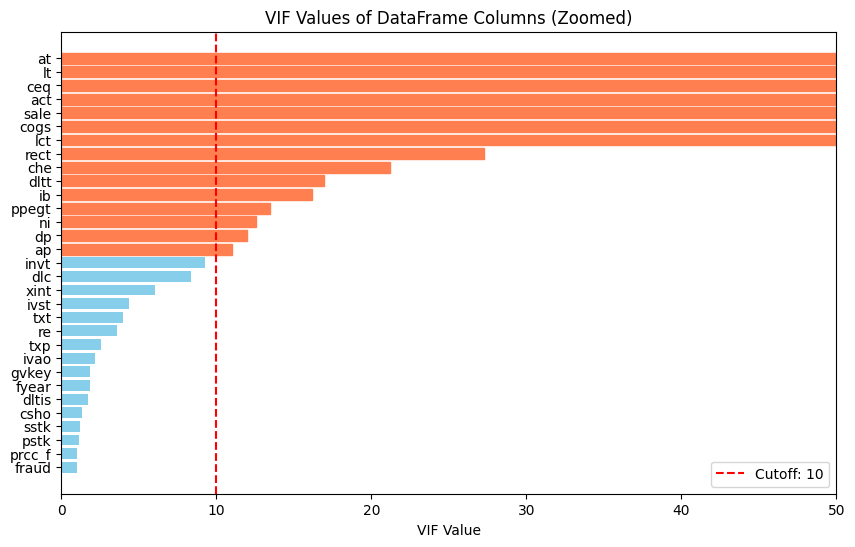

In [ ]:
# zoom in to explore smaller VIF values
plt.figure(figsize=(10, 6))
bars_zoomed = plt.barh(vif_data['Column'], vif_data['VIF'], color='skyblue')
cutoff_value = 10
plt.axvline(x=cutoff_value, color='red', linestyle='--', label=f'Cutoff: {cutoff_value}')
plt.xlabel('VIF Value')
plt.title('VIF Values of DataFrame Columns (Zoomed)')
plt.legend()

# Highlight bars above the cutoff value
for bar in bars_zoomed:
    if bar.get_width() > cutoff_value:
        bar.set_color('coral')

plt.xlim(0, 50)  # Set x-axis limits for zoomed-in version
plt.gca().invert_yaxis()  # Invert y-axis to display the highest VIF at the top
plt.show()

In [ ]:
# generate stratified 10-fold cross validations
folds = StratifiedKFold(n_splits=10)

# lists to store true and predicted values
y_true = []
logistic_predicted = []

# generate predictions for all 10 folds
for train_index, test_index in folds.split(train_df, train_labels):
    x_train, x_val = train_df.iloc[train_index], train_df.iloc[test_index]
    y_train, y_val = train_labels.iloc[train_index], train_labels.iloc[test_index]

    # fit the model
    logistic_fitted = sm.Logit(y_train, x_train).fit(disp=0)

    # evaluate the model
    logistic_pred = logistic_fitted.predict(x_val)

    # update lists
    y_true.extend(y_val)
    logistic_predicted.extend(logistic_pred)

# classification report
print(classification_report(y_true, (np.array(logistic_predicted) > 0.5)))

              precision    recall  f1-score   support

           0       0.99      0.45      0.62    126726
           1       0.01      0.58      0.01       875

    accuracy                           0.45    127601
   macro avg       0.50      0.51      0.31    127601
weighted avg       0.99      0.45      0.61    127601



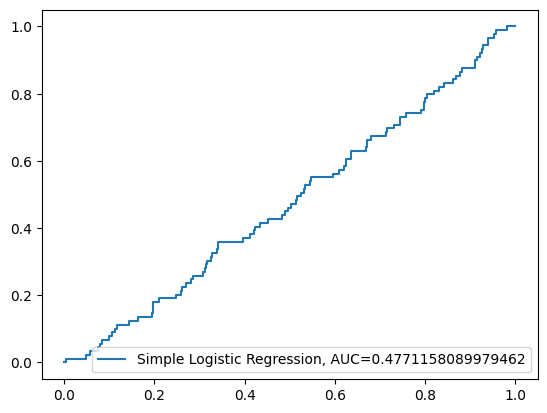

In [ ]:
# full data, full features
logistic_model = sm.Logit(train_labels, train_df).fit(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = logistic_model.predict(test_df)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
auc = roc_auc_score(test_labels, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
# a lot of the features seem to be highly correlated
# this is expected given the domain knowledge of this dataset since certain financial metrics are linked to others

# some VIF values are exceptionally high
# for example, Assets Total (at) has a VIF of over 700, indicating an immense multicollinearity concern
# if a VIF cutoff of 5 is used, a lot of the features will have to be dropped
# considering that some correlation between features is expected based on the domain knowledge of the data,
# a VIF cutoff of 10 will be used

# get features with VIF over 10
discard_cols = vif_data[vif_data['VIF'] > 10]['Column'].values.tolist()

# discard features with VIF over 10
train_df = train_df.drop(columns=discard_cols)
test_df = test_df.drop(columns=discard_cols)
train_df

,csho,dlc,dltis,invt,ivao,ivst,prcc_f,pstk,re,sstk,txp,txt,xint
0,-0.174678,-0.121148,-0.103446,-0.178353,-0.067671,-0.084971,-0.212737,-0.093795,-0.089310,-0.128242,-0.121463,-0.115496,-0.209309
1,-0.172774,-0.124336,-0.122382,-0.180178,-0.067576,-0.084971,-0.325017,-0.093795,-0.091128,-0.128214,-0.121463,-0.117126,-0.218676
2,-0.172171,-0.118056,-0.119629,-0.176264,-0.058370,-0.081264,-0.233154,-0.093795,-0.080761,-0.128242,-0.121463,-0.115036,-0.200296
3,-0.170557,-0.115764,-0.123260,-0.164214,-0.067671,-0.084971,-0.316291,-0.080811,-0.089754,-0.128242,-0.119168,-0.116352,-0.209663
4,-0.158576,-0.081019,-0.123453,-0.115029,-0.067671,-0.084971,0.239347,-0.093795,-0.077367,-0.128242,-0.085242,-0.098866,-0.156130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127596,-0.051780,-0.124357,-0.123620,-0.180893,-0.067671,-0.084971,-0.350637,-0.093795,-0.090689,-0.128242,-0.121463,-0.117190,-0.222211
127597,0.051063,0.182718,0.206299,-0.123555,-0.033789,0.007708,0.007530,-0.093795,-0.011606,0.722862,-0.121463,-0.018642,0.472130
127598,-0.031276,-0.124300,-0.123620,-0.173050,-0.067671,-0.084971,-0.337571,-0.093795,-0.121912,0.115423,-0.121463,-0.116922,-0.222189
127599,5.491424,-0.124357,-0.123620,-0.180893,-0.067671,-0.084971,-0.347487,-0.093795,-0.132115,0.024059,-0.121463,-0.117126,-0.199323


In [ ]:
# generate stratified 10-fold cross validations
folds = StratifiedKFold(n_splits=10)

# lists to store true and predicted values
y_true = []
logistic_predicted = []

# generate predictions for all 10 folds
for train_index, test_index in folds.split(train_df, train_labels):
    x_train, x_val = train_df.iloc[train_index], train_df.iloc[test_index]
    y_train, y_val = train_labels.iloc[train_index], train_labels.iloc[test_index]

    # fit the model
    logistic_fitted = sm.Logit(y_train, x_train).fit(disp=0)

    # evaluate the model
    logistic_pred = logistic_fitted.predict(x_val)

    # update lists
    y_true.extend(y_val)
    logistic_predicted.extend(logistic_pred)

# classification report
print(classification_report(y_true, (np.array(logistic_predicted) > 0.5)))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60    126726
           1       0.01      0.56      0.01       875

    accuracy                           0.43    127601
   macro avg       0.50      0.49      0.31    127601
weighted avg       0.99      0.43      0.60    127601



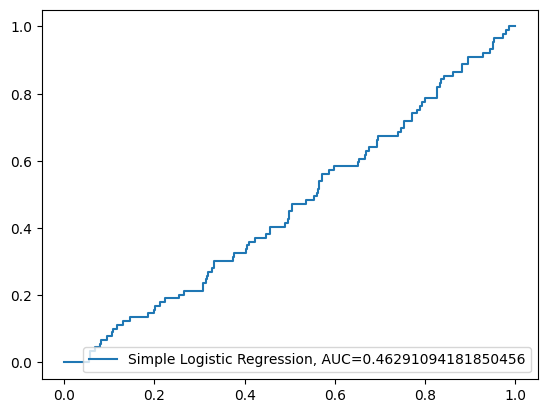

In [ ]:
# the model still performs worse than random guessing
# a major problem is due to the imbalance in the data
# logistic regression models do not work well with such high data imbalance
# precision and recall for the positive class are extremely low


# full data, reduced features
logistic_model = sm.Logit(train_labels, train_df).fit(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = logistic_model.predict(test_df)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
auc = roc_auc_score(test_labels, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
# model summary
print(logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               127601
Model:                          Logit   Df Residuals:                   127588
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  -15.90
Time:                        06:46:14   Log-Likelihood:                -88423.
converged:                       True   LL-Null:                       -5231.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
csho           0.0705      0.012      5.816      0.000       0.047       0.094
dlc           -0.0045      0.009     -0.496      0.620      -0.022       0.013
dltis          0.0087      0.007      1.244      0.2

In [ ]:
# data is highly imbalanced, causing major problems in learning to identify positive class
# create undersampler
undersampler = RandomUnderSampler(random_state=42, sampling_strategy=.4)

# resample the data
X_resampled, y_resampled = undersampler.fit_resample(standardized_df.drop(columns=['fraud']), standardized_df['fraud'])

In [ ]:
# generate stratified 10-fold cross validations
folds = StratifiedKFold(n_splits=10)

# lists to store true and predicted values
y_true = []
logistic_predicted = []

# define data for splitting
x = X_resampled.drop(columns=['gvkey', 'fyear'])
y = y_resampled

# generate predictions for all 10 folds
for train_index, test_index in folds.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # fit the model
    logistic_fitted = sm.Logit(y_train, x_train).fit(disp=0)

    # evaluate the model
    logistic_pred = logistic_fitted.predict(x_val)

    # update lists
    y_true.extend(y_val)
    logistic_predicted.extend(logistic_pred)

# classification report for logistic model
print(classification_report(y_true, (np.array(logistic_predicted) > 0.5)))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2410
           1       0.45      0.51      0.48       964

    accuracy                           0.68      3374
   macro avg       0.62      0.63      0.63      3374
weighted avg       0.70      0.68      0.69      3374



In [ ]:
# slight improvement in precision and accuracy is seen
# train test split for AUC plots
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, stratify=y, random_state=42)

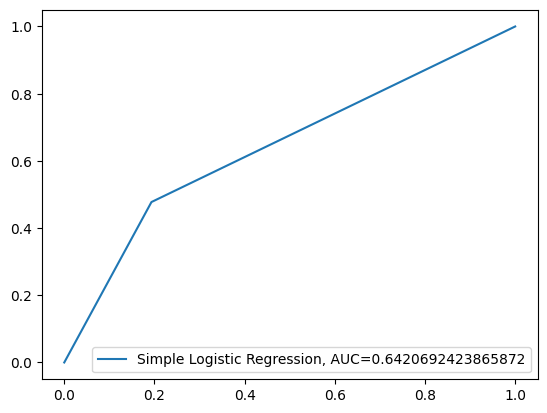

In [ ]:
# undersampled data, full features
logistic_model = sm.Logit(ytrain, xtrain).fit(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = (np.array(logistic_model.predict(xtest)) > 0.5)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(ytest, (np.array(y_pred_proba) > 0.5)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       724
           1       0.50      0.48      0.49       289

    accuracy                           0.71      1013
   macro avg       0.65      0.64      0.64      1013
weighted avg       0.71      0.71      0.71      1013



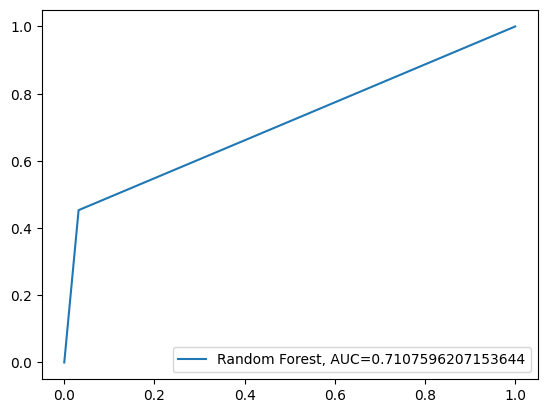

In [ ]:
# AUC improves, but precision and recall for positive class do not improve much

# random forest model
# undersampled data, full features
rf_model = RandomForestClassifier(n_estimators=500, random_state=123, class_weight='balanced_subsample', criterion='log_loss', max_features=5, n_jobs=-1).fit(xtrain, ytrain)

# AUC-ROC curve for the random forest model
y_pred_proba = rf_model.predict(xtest)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
rf_pred = rf_model.predict(xtest)

print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       724
           1       0.85      0.45      0.59       289

    accuracy                           0.82      1013
   macro avg       0.83      0.71      0.74      1013
weighted avg       0.83      0.82      0.80      1013



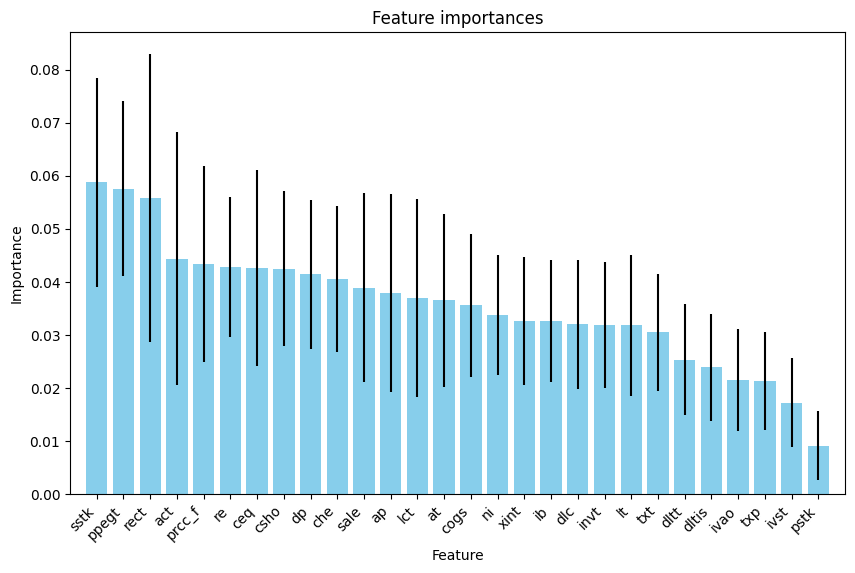

In [ ]:
# random forest model performs much better than the logistic model for precision for positive class
# slightly better in terms of AUC
# however recall for positive class is still bad

# get feature importances
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = xtrain.columns

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices], color="skyblue", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlim([-1, xtrain.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
# adaboost model
# undersampled data, full features
adamodel = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, random_state=123)
ada_fitted = adamodel.fit(xtrain, ytrain)
adapred = ada_fitted.predict(xtest)
adaprobs = ada_fitted.predict_proba(xtest)[:,1]

print(classification_report(ytest, adapred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       724
           1       0.68      0.22      0.33       289

    accuracy                           0.75      1013
   macro avg       0.72      0.59      0.59      1013
weighted avg       0.73      0.75      0.70      1013



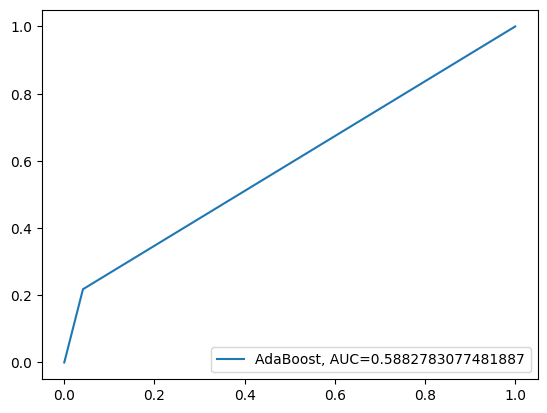

In [ ]:
# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  adapred)
auc = roc_auc_score(ytest, adapred)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

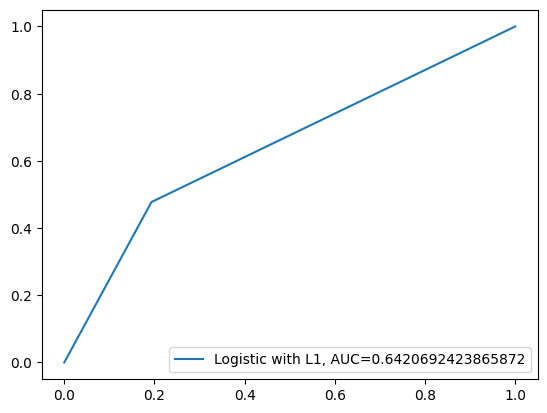

In [ ]:
# regularized logistic with LASSO
# undersampled data, full features
logistic_model = sm.Logit(ytrain, xtrain).fit_regularized(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = (np.array(logistic_model.predict(xtest)) > 0.5)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Logistic with L1, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(ytest, (np.array(y_pred_proba) > 0.5)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       724
           1       0.50      0.48      0.49       289

    accuracy                           0.71      1013
   macro avg       0.65      0.64      0.64      1013
weighted avg       0.71      0.71      0.71      1013



In [ ]:
# consider dropping some variables with high VIF values from undersampled data
# get features with VIF over 10
discard_cols = vif_data[vif_data['VIF'] > 10]['Column'].values.tolist()

# discard features with VIF over 10
xtrain = xtrain.drop(columns=discard_cols)
xtest = xtest.drop(columns=discard_cols)
xtrain

,csho,dlc,dltis,invt,ivao,ivst,prcc_f,pstk,re,sstk,txp,txt,xint
3359,-0.021751,-0.116607,-0.123620,-0.180893,-0.067671,-0.084971,0.746965,-0.093795,0.132079,-0.079671,-0.121463,0.059249,-0.187156
1114,-0.162708,-0.124357,-0.123620,-0.167977,-0.020246,-0.062057,1.178515,-0.093795,0.008672,-0.128242,-0.121463,-0.080111,-0.222216
725,-0.168599,-0.121519,-0.117076,-0.147333,-0.067671,-0.084971,0.366864,-0.093795,-0.067898,-0.125367,-0.109672,-0.107415,-0.219506
2124,-0.161294,-0.124357,-0.122377,-0.159414,-0.067671,-0.084971,-0.049403,-0.093755,-0.069684,-0.128242,-0.121463,-0.121828,-0.206061
3082,-0.124306,-0.124357,-0.123620,-0.178920,-0.067671,-0.084971,-0.248904,-0.093795,-0.089309,-0.125980,-0.122349,-0.108929,-0.222211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.065508,-0.104698,-0.034580,-0.164877,-0.048561,-0.074564,-0.034003,-0.093795,-0.107411,-0.128043,-0.098717,-0.140641,-0.040570
2091,0.157284,-0.124357,-0.123620,-0.180893,-0.067671,-0.083291,-0.338971,10.874392,-0.282765,-0.128242,0.084102,-0.114593,-0.204136
182,0.007396,-0.122342,-0.123445,-0.180893,-0.067332,-0.084971,-0.350987,-0.083768,-0.107107,-0.127700,-0.121463,-0.117126,-0.218443
581,-0.134754,-0.123681,-0.123620,-0.165233,-0.065293,-0.084971,-0.210637,-0.093795,-0.090954,-0.127616,-0.121463,-0.114989,-0.220701


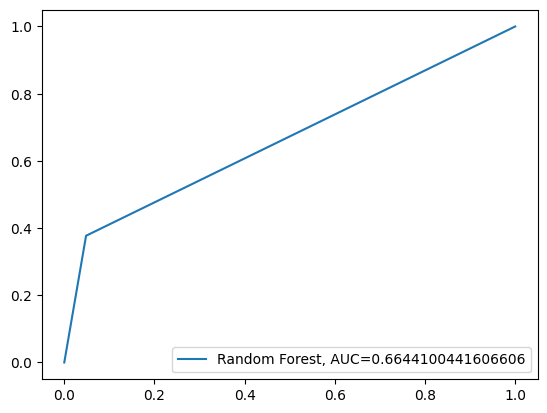

In [ ]:
# random forest model
# undersampled data, reduced features
rf_model = RandomForestClassifier(n_estimators=500, random_state=123, class_weight='balanced_subsample', criterion='log_loss', max_features=5, n_jobs=-1).fit(xtrain, ytrain)

# AUC-ROC curve for the random forest model
y_pred_proba = rf_model.predict(xtest)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
rf_pred = rf_model.predict(xtest)

print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       724
           1       0.76      0.38      0.50       289

    accuracy                           0.79      1013
   macro avg       0.77      0.66      0.68      1013
weighted avg       0.78      0.79      0.76      1013



In [ ]:
# adaboost model
# undersampled data, reduced features
adamodel = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, random_state=123)
ada_fitted = adamodel.fit(xtrain, ytrain)
adapred = ada_fitted.predict(xtest)
adaprobs = ada_fitted.predict_proba(xtest)[:,1]

print(classification_report(ytest, adapred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       724
           1       0.69      0.17      0.27       289

    accuracy                           0.74      1013
   macro avg       0.72      0.57      0.56      1013
weighted avg       0.73      0.74      0.68      1013



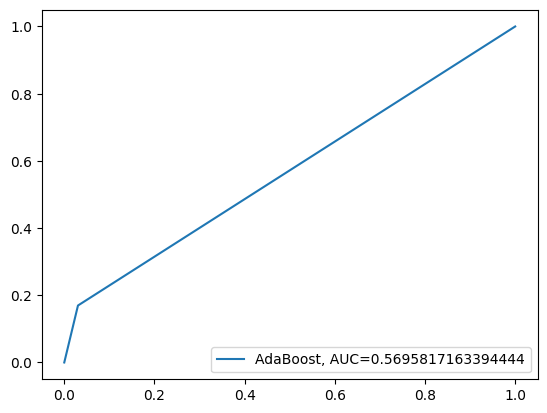

In [ ]:
# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  adapred)
auc = roc_auc_score(ytest, adapred)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

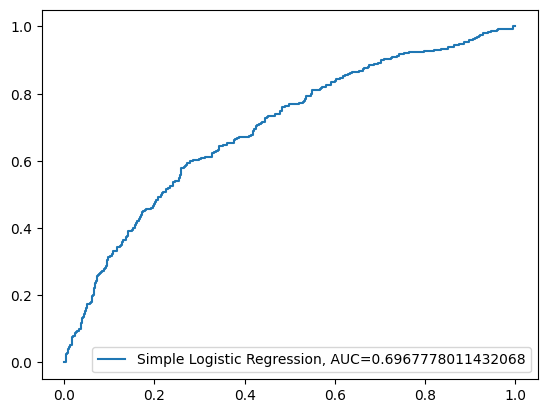

In [ ]:
# undersampled data, reduced features
logistic_model = sm.Logit(ytrain, xtrain).fit(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = logistic_model.predict(xtest)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(ytest, (np.array(y_pred_proba) > 0.5)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       724
           1       0.47      0.58      0.52       289

    accuracy                           0.69      1013
   macro avg       0.64      0.66      0.64      1013
weighted avg       0.71      0.69      0.70      1013



In [ ]:
print(logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 2361
Model:                          Logit   Df Residuals:                     2348
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                 -0.1260
Time:                        06:47:38   Log-Likelihood:                -1590.9
converged:                       True   LL-Null:                       -1412.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
csho           0.7630      0.173      4.420      0.000       0.425       1.101
dlc            0.0335      0.074      0.450      0.652      -0.112       0.179
dltis         -0.0827      0.118     -0.704      0.4

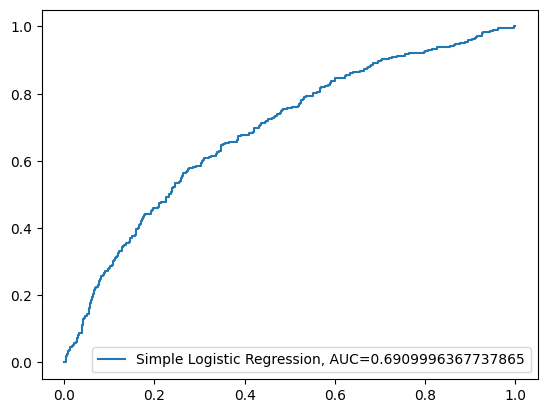

In [ ]:
# only a few variables are statistically significant
# logistic model with significant variables, undersampled data
logistic_model = sm.Logit(ytrain, xtrain.loc[:, ['csho', 'prcc_f', 'pstk', 're']]).fit(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = logistic_model.predict(xtest.loc[:, ['csho', 'prcc_f', 'pstk', 're']])

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(ytest, (np.array(y_pred_proba) > 0.5)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       724
           1       0.45      0.57      0.50       289

    accuracy                           0.68      1013
   macro avg       0.63      0.65      0.64      1013
weighted avg       0.71      0.68      0.69      1013



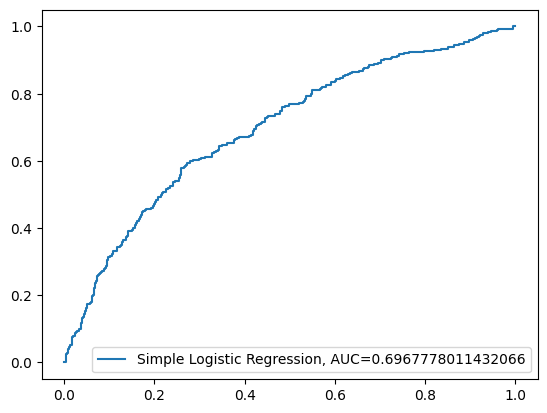

In [ ]:
# removing the variables does not help much
# regularized logistic regression using LASSO penalty
# logistic model with significant variables, undersampled data
logistic_model = sm.Logit(ytrain, xtrain).fit_regularized(disp=0)

# AUC-ROC curve for the simple logistic regression model
y_pred_proba = logistic_model.predict(xtest)

# get false positive rates and true positive rates
# calculate AUC - area under the curve
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)

# plot ROC curve
# this shows how well the model predicts comprehensively at
# varied classification thresholds
plt.plot(fpr,tpr,label="Simple Logistic Regression, AUC="+str(auc))
plt.plot
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(ytest, (np.array(y_pred_proba) > 0.5)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       724
           1       0.47      0.58      0.52       289

    accuracy                           0.69      1013
   macro avg       0.64      0.66      0.64      1013
weighted avg       0.71      0.69      0.70      1013

